<a href="https://colab.research.google.com/github/niharikakap/fakenews_detection/blob/main/fake_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [27]:
df_fake = pd.read_csv("/content/Fake.csv")
df_true = pd.read_csv("/content/True.csv")

In [28]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [29]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [30]:
df_fake["class"] = 0
df_true["class"] = 1

In [31]:
df_fake.shape, df_true.shape

((23481, 5), (19569, 5))

In [32]:
# Removing last 10 rows for manual testing
df_fake_manual_testing = df_fake.tail(10)
for i in range(23470,23460,-1):
    df_fake.drop([i], axis = 0, inplace = True)


df_true_manual_testing = df_true.tail(10)
for i in range(19568,19558,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [33]:
df_fake.shape, df_true.shape

((23471, 5), (19559, 5))

In [34]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

<ipython-input-34-3aaf8ec2aad1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
<ipython-input-34-3aaf8ec2aad1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [35]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [36]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
19559,Record number of states punishing human rights...,"GENEVA (Reuters) - A record 29 states, includi...",worldnews,"September 20, 2017",1
19560,Kyrgyzstan accuses Kazakhstan of backing oppos...,BISHKEK (Reuters) - Kyrgyzstan accused Kazakhs...,worldnews,"September 20, 2017",1
19561,Fake letters tell Germans the web has worked o...,BERLIN (Reuters) - German prosecutors said on ...,worldnews,"September 20, 2017",1
19562,Saudi Arabia does not believe Iran abiding by ...,UNITED NATIONS (Reuters) - Saudi Arabia does n...,worldnews,"September 20, 2017",1
19563,We want it in writing: Scotland and Wales seek...,LONDON (Reuters) - Scotland and Wales proposed...,worldnews,"September 20, 2017",1
19564,Philippine Congress agrees to restore rights c...,MANILA (Reuters) - The Philippines Congress l...,worldnews,"September 20, 2017",1
19565,Trump's threat to 'destroy' North Korea is wro...,BERLIN (Reuters) - Germany and the United Stat...,worldnews,"September 20, 2017",1
19566,U.S. urges Congolese security forces' restrain...,WASHINGTON (Reuters) - The U.S. State Departme...,worldnews,"September 20, 2017",1
19567,Exclusive: From Russia with fuel - North Korea...,MOSCOW (Reuters) - At least eight North Korean...,worldnews,"September 20, 2017",1
19568,Merkel d,NaN,NaN,NaN,1


In [37]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

In [38]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [39]:
df_merge.columns


Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [40]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [41]:
df.isnull().sum()

,0
text,0
class,0


In [42]:
df = df.sample(frac = 1)

In [43]:
df.head()

,text,class
10008,WASHINGTON (Reuters) - The U.S. State Departme...,1
2007,A DC rally meant to prove the existence of th...,0
10304,"PALM BEACH, Fla. (Reuters) - Republican front-...",1
23309,Tune in to the Alternate Current Radio Network...,0
7671,Add comedian Louis C.K. to the ever-growing lo...,0


In [44]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [45]:
df.columns

Index(['text', 'class'], dtype='object')

In [46]:
df.head(
)

,text,class
0,WASHINGTON (Reuters) - The U.S. State Departme...,1
1,A DC rally meant to prove the existence of th...,0
2,"PALM BEACH, Fla. (Reuters) - Republican front-...",1
3,Tune in to the Alternate Current Radio Network...,0
4,Add comedian Louis C.K. to the ever-growing lo...,0


In [47]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [48]:
df["text"] = df["text"].apply(wordopt)

In [49]:
x = df["text"]
y = df["class"]

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [52]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [53]:
pred_lr=LR.predict(xv_test)

In [54]:
LR.score(xv_test, y_test)

0.9856850715746421

In [55]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5871
           1       0.98      0.99      0.98      4887

    accuracy                           0.99     10758
   macro avg       0.99      0.99      0.99     10758
weighted avg       0.99      0.99      0.99     10758



In [104]:
import pickle

# Save the trained model
with open('fake_news_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the vectorizer
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)


In [56]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [57]:
pred_rfc = RFC.predict(xv_test)

In [58]:
RFC.score(xv_test, y_test)

0.988194831753114

In [59]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5871
           1       0.99      0.99      0.99      4887

    accuracy                           0.99     10758
   macro avg       0.99      0.99      0.99     10758
weighted avg       0.99      0.99      0.99     10758



In [64]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [65]:
pred_dt = DT.predict(xv_test)

In [66]:
DT.score(xv_test, y_test)

0.9962818367726343

In [67]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5871
           1       1.00      0.99      1.00      4887

    accuracy                           1.00     10758
   macro avg       1.00      1.00      1.00     10758
weighted avg       1.00      1.00      1.00     10758



In [71]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [72]:
pred_gbc = GBC.predict(xv_test)

In [73]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5871
           1       0.99      1.00      0.99      4887

    accuracy                           0.99     10758
   macro avg       0.99      0.99      0.99     10758
weighted avg       0.99      0.99      0.99     10758



In [74]:
GBC.score(xv_test, y_test)

0.9942368469975832

In [75]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC .predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format
     (output_lable(pred_LR[0]), output_lable(pred_DT[0]),output_lable(pred_GBC[0]), output_lable(pred_RFC[0])))

In [76]:
news = str(input())
manual_testing(news)

BRUSSELS (Reuters) - NATO allies on Tuesday welcomed President Donald Trump s decision to commit more forces to Afghanistan, as part of a new U.S. strategy he said would require more troops and funding from America s partners. Having run for the White House last year on a pledge to withdraw swiftly from Afghanistan, Trump reversed course on Monday and promised a stepped-up military campaign against  Taliban insurgents, saying:  Our troops will fight to win .  U.S. officials said he had signed off on plans to send about 4,000 more U.S. troops to add to the roughly 8,400 now deployed in Afghanistan. But his speech did not define benchmarks for successfully ending the war that began with the U.S.-led invasion of Afghanistan in 2001, and which he acknowledged had required an   extraordinary sacrifice of blood and treasure .  We will ask our NATO allies and global partners to support our new strategy, with additional troops and funding increases in line with our own. We are confident they w

In [77]:
news = str(input())
manual_testing(news)

Vic Bishop Waking TimesOur reality is carefully constructed by powerful corporate, political and special interest sources in order to covertly sway public opinion. Blatant lies are often televised regarding terrorism, food, war, health, etc. They are fashioned to sway public opinion and condition viewers to accept what have become destructive societal norms.The practice of manipulating and controlling public opinion with distorted media messages has become so common that there is a whole industry formed around this. The entire role of this brainwashing industry is to figure out how to spin information to journalists, similar to the lobbying of government. It is never really clear just how much truth the journalists receive because the news industry has become complacent. The messages that it presents are shaped by corporate powers who often spend millions on advertising with the six conglomerates that own 90% of the media:General Electric (GE), News-Corp, Disney, Viacom, Time Warner, a

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [79]:
!pip install matplotlib seaborn wordcloud

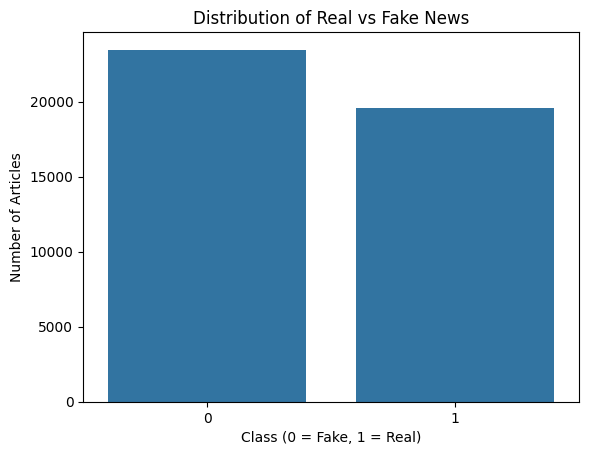

In [80]:
sns.countplot(data=df, x='class')
plt.title("Distribution of Real vs Fake News")
plt.xlabel("Class (0 = Fake, 1 = Real)")
plt.ylabel("Number of Articles")
plt.show()

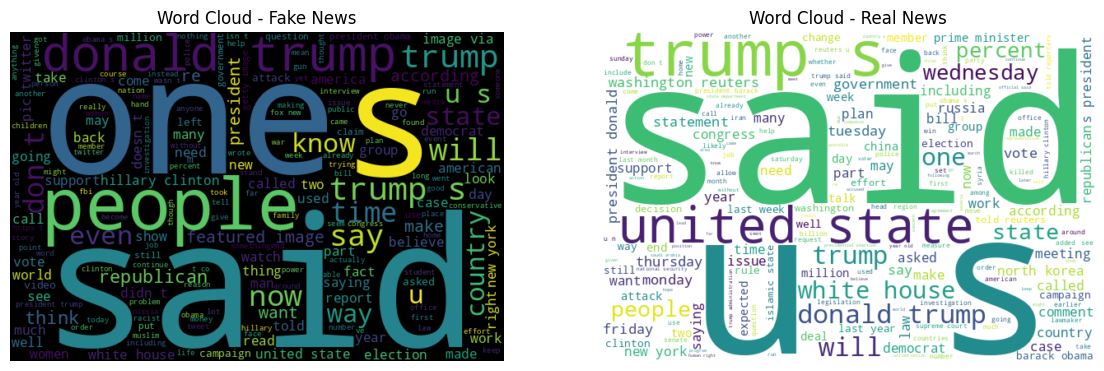

In [81]:
# Join all text into a single string
fake_words = ' '.join(df[df['class'] == 0]['text'])
real_words = ' '.join(df[df['class'] == 1]['text'])

# Plot WordCloud
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
wc_fake = WordCloud(width=600, height=400, background_color='black').generate(fake_words)
plt.imshow(wc_fake, interpolation='bilinear')
plt.title("Word Cloud - Fake News")
plt.axis('off')

plt.subplot(1, 2, 2)
wc_real = WordCloud(width=600, height=400, background_color='white').generate(real_words)
plt.imshow(wc_real, interpolation='bilinear')
plt.title("Word Cloud - Real News")
plt.axis('off')

plt.show()


In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform the training data, transform the test data
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)


In [89]:
from sklearn.linear_model import PassiveAggressiveClassifier

model = PassiveAggressiveClassifier(max_iter=50)
model.fit(x_train_vectorized, y_train)

PassiveAggressiveClassifier(max_iter=50)

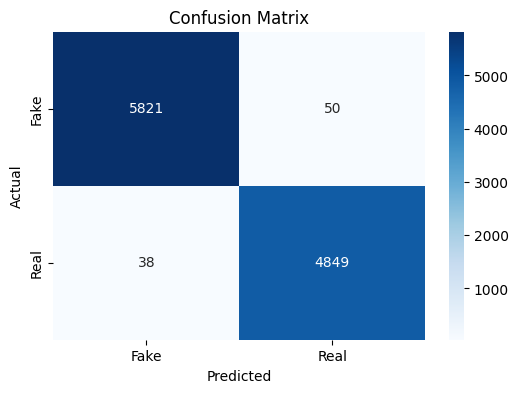

In [91]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(x_test_vectorized)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake','Real'], yticklabels=['Fake','Real'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



In [92]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['Fake', 'Real']))


              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      5871
        Real       0.99      0.99      0.99      4887

    accuracy                           0.99     10758
   macro avg       0.99      0.99      0.99     10758
weighted avg       0.99      0.99      0.99     10758



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-94-532234b2c378>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='viridis')


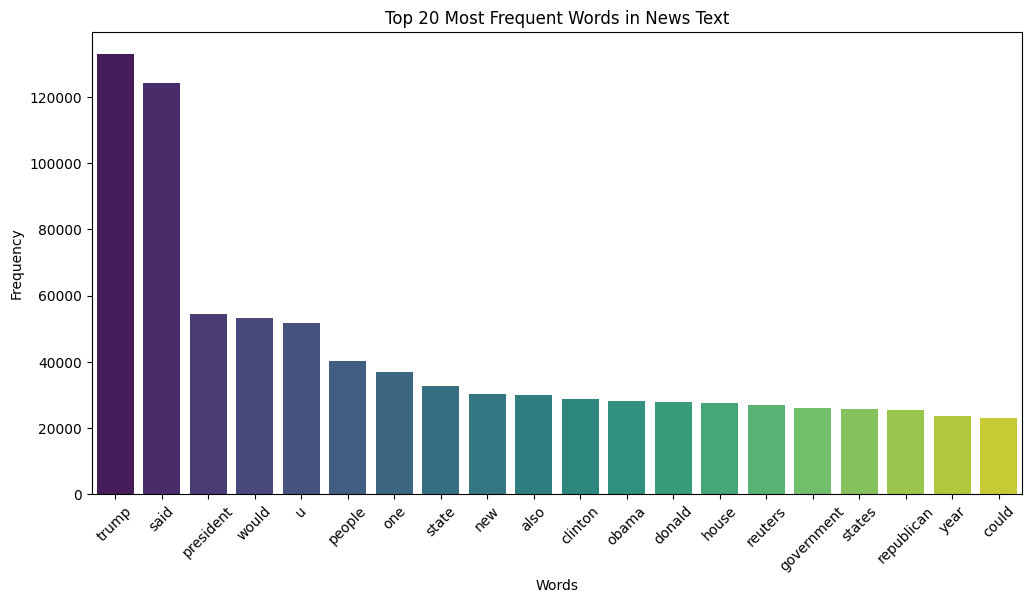

In [94]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Combine all text
all_words = ' '.join(df['text']).lower().split()

# Remove stopwords like "the", "is", etc.
filtered_words = [word for word in all_words if word not in stopwords.words('english')]

# Count most common words
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)

# Plot
words, counts = zip(*common_words)
plt.figure(figsize=(12,6))
sns.barplot(x=list(words), y=list(counts), palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words in News Text")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Convert text into numerical format
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)


In [98]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Define the models
models = {
    "Naive Bayes": MultinomialNB(),
    "Passive Aggressive": PassiveAggressiveClassifier(max_iter=50),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVC": LinearSVC()
}

# Store scores
scores = {}

# Train on vectorized data
for name, model in models.items():
    model.fit(x_train_vectorized, y_train)
    y_pred = model.predict(x_test_vectorized)
    scores[name] = accuracy_score(y_test, y_pred)


<ipython-input-99-8a3fcde34402>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(scores.keys()), y=list(scores.values()), palette="coolwarm")


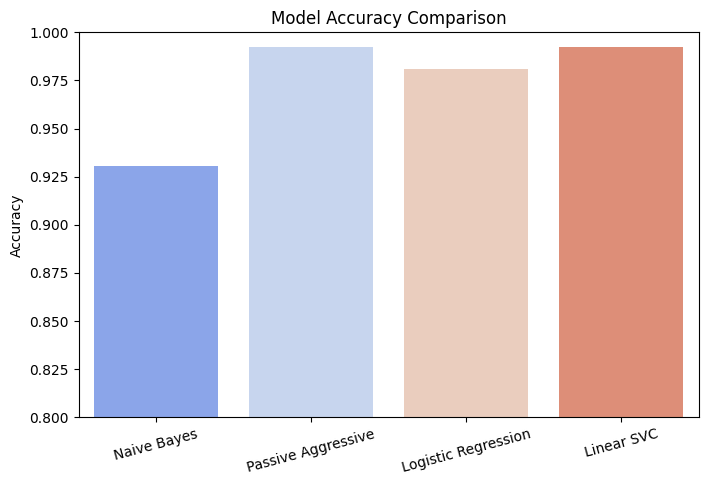

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x=list(scores.keys()), y=list(scores.values()), palette="coolwarm")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.xticks(rotation=15)
plt.show()


In [100]:
!pip install flask flask-ngrok

In [114]:
!pip install flask-cors

In [107]:
!pip install pyngrok


In [119]:
from flask_cors import CORS
from flask import Flask, request, jsonify
from pyngrok import ngrok, conf

# ✅ STEP 2: Set ngrok authtoken first (VERY IMPORTANT!)
conf.get_default().auth_token = "add your ngrok token"

app = Flask(__name__)
CORS(app)

# Dummy model function — replace with real model
def predict_fake_news(text):
    return 0 if "fake" in text.lower() else 1

@app.route("/")
def home():
    return "Fake News Detection API"

@app.route("/predict", methods=["POST"])
def predict():
    data = request.get_json()
    text = data.get("text", "")
    prediction = predict_fake_news(text)
    return jsonify({"prediction": prediction})

# ✅ Create ngrok tunnel
public_url = ngrok.connect(5000)
print(" * ngrok tunnel:", public_url)

# ✅ Run Flask app
app.run()


 * ngrok tunnel: NgrokTunnel: "https://01cb-35-231-182-44.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
